# Візуалізація даних.<dr>
 Data visualization


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

## Набір даних Taxis<dr>
    Taxis dataset

Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті]<br>
    
The dataset contains taxi trips in New York City in 2019. Detailed description on (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних: <br>
What are the columns of the data set:
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Слово borough перекладається з англійської як "район".<br>
 Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

In [3]:
df_taxi = sns.load_dataset('taxis')

1.Виводимо перші 3 записи з набору даних, типи даних в наборі даних df_taxi, розміри набору даних. <br>
Output the first 3 records from the data set, the data types in the df_taxi data set, the data set sizes.

In [5]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

2.Перевіримо, чи є в цьому наборі даних пропущені значення.<br>
Let's check if there are any missing values in this data set.

In [6]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Виводимо на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення.<br>
We display those rows where the column with the most missing values (or one of those with the maximum number of missing values) has missing values.

In [7]:
missing_values = df_taxi.isna().sum()
columns_with_max_missing_values = missing_values[missing_values == missing_values.max()]
columns_with_max_missing_values


dropoff_zone       45
dropoff_borough    45
dtype: int64

In [8]:
max_na_column = df_taxi.isna().sum().idxmax()
rows_with_max_na = df_taxi[df_taxi[max_na_column].isna()]
display(rows_with_max_na)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


Можливо в тому районі або зоні падає сервер і немає зв`язкку. 
Що до дистанціїї 0 можливо було почата поїздка, але після було скасування за очікування і тим самим ми не отримаємо район завершення поїздки. <br>
It is possible that the server is down in that area or zone and there is no connection.
As for the distance 0, the trip may have been started, but after it was canceled due to waiting, and thus we will not receive the area of the end of the trip

3.Заповнимо пусті значення.<br>
Let's fill in the blank values.

In [9]:
df_taxi_clean = df_taxi.fillna("NA")

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4.Перетворюємо у формат `datetime64[ns]`.<br>
We convert to `datetime64[ns]` format

In [11]:
df_taxi_clean["pickup"] = pd.to_datetime(df_taxi_clean["pickup"])

In [10]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

5. Прибраємо час і робимо аналітику по дням.<br>
We take our time and do analytics on a day-by-day basis.

In [12]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor("d")

А тепер групуємо дані по pickup_day та виводимо графік сумарних платежів по дням.<br>
And now we group the data by pickup_day and display a schedule of total payments by day.

In [12]:
%matplotlib inline

<Axes: xlabel='pickup_day'>

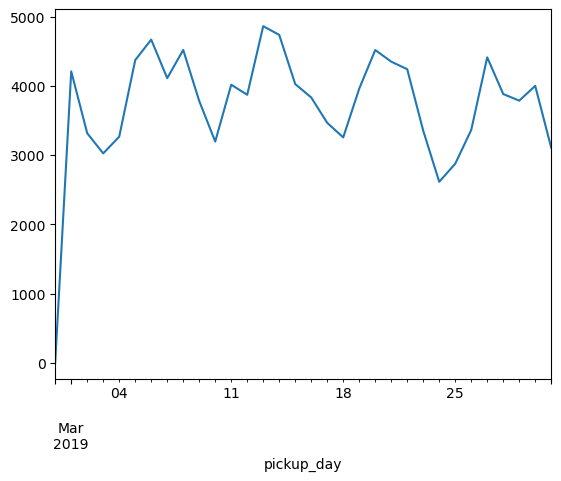

In [13]:
sum_pickup_day = df_taxi_clean.groupby('pickup_day')["total"].sum()
sum_pickup_day.plot()

Text(0.5, -0.35, 'pickup day')

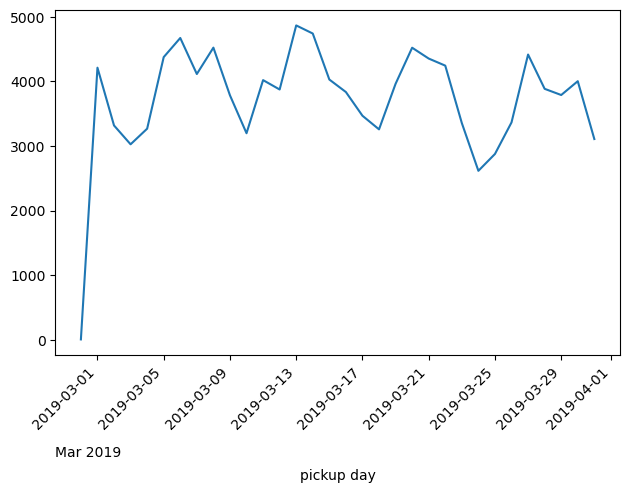

In [14]:
plt.plot(sum_pickup_day);
plt.xticks(rotation=45, ha ="right")
plt.xlabel("Mar 2019", labelpad = 10, loc="left")
plt.tight_layout()
plt.text(0.50, -0.35, "pickup day", ha="center", va="center", transform=plt.gca().transAxes)

Нерівномірність поїздок які впливають на суму, та день з минуого місяця який потрапив у графік.<br>
Irregularity of trips that affect the amount, and the day from last month that got into the schedule.

6.Виводимо кількість рядків для кожного pickup_day.<br>
We output the number of rows for each pickup_day.

In [15]:
df_taxi_clean['pickup_day'].value_counts()

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

Видаляємо дату 2019-02-28 потрапив сюди випадково. Виводимо графік сумарних платежів по pickup_day.<br>
We are deleting the date 2019-02-28 I got here by accident. We display the schedule of total payments by pickup_day.

In [16]:
df_taxi_clean.drop(df_taxi_clean[df_taxi_clean["pickup_day"]== "2019-02-28"].index, inplace = True)

Text(0.5, -0.35, 'pickup day')

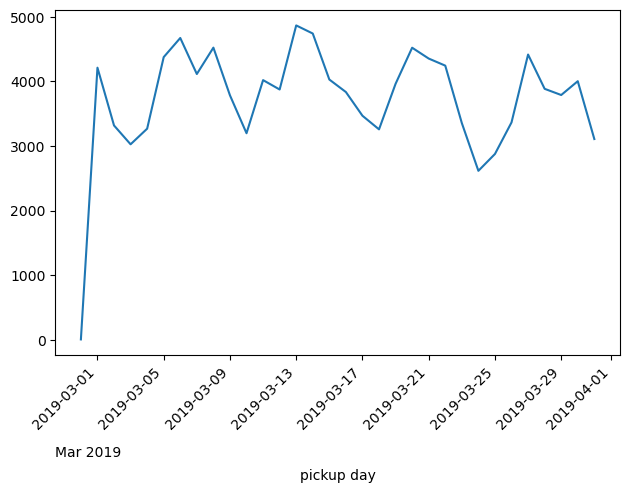

In [17]:
plt.plot(sum_pickup_day);
plt.xticks(rotation=45, ha ="right")
plt.xlabel("Mar 2019", labelpad = 10, loc="left")
plt.tight_layout()
plt.text(0.50, -0.35, "pickup day", ha="center", va="center", transform=plt.gca().transAxes)

7.Виводимо динаміку сумарних платежів по районам. Видаляємо колонку зі значенням `pickup_borough` рівним `NA` - нам ці дані не потрібні.<br>
We derive the dynamics of total payments by district. We delete the column with the value `pickup_borough` equal to `NA` - we do not need this data.

In [13]:
borough_pivot = df_taxi_clean.pivot_table(index= "pickup_day", columns="pickup_borough", values="total", aggfunc="sum")
borough_pivot.drop(columns="NA", inplace=True)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-02-28,NaN,NaN,NaN,6.30
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34


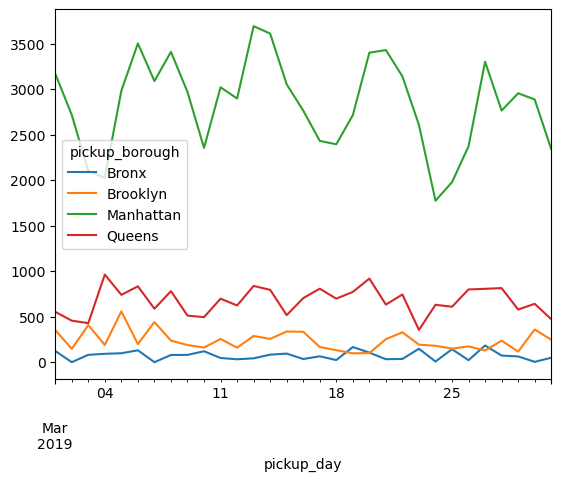

In [19]:
borough_pivot.fillna(0).plot();

Найчастіше найбільша сума денних платежів у Manhattan<br>
Often the largest amount of daily payments in Manhattan

<Axes: xlabel='pickup_day'>

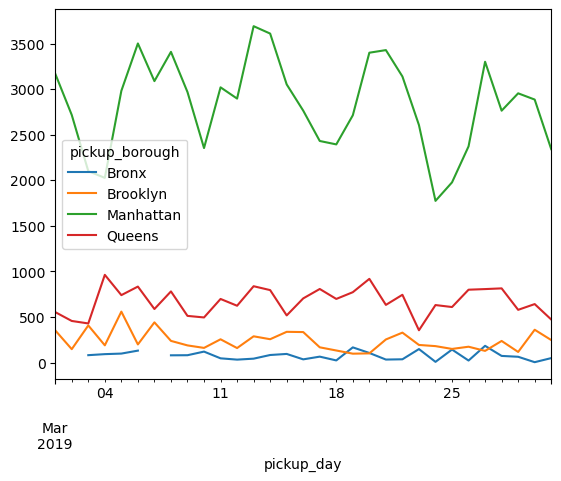

In [20]:
borough_pivot.plot()

Ми використали borough_pivot.fillna(0).plot(); щоб не було видно перериву між лінією графіку, значень яких ми не маємо.<br>
We used borough_pivot.fillna(0).plot(); so that there is no break between the graph line, the values of which we do not have

8.Виводимо гістограму суми денних платежів за поїздки по кожному з районів.<br>
We display a histogram of the amount of daily payments for trips in each of the districts.

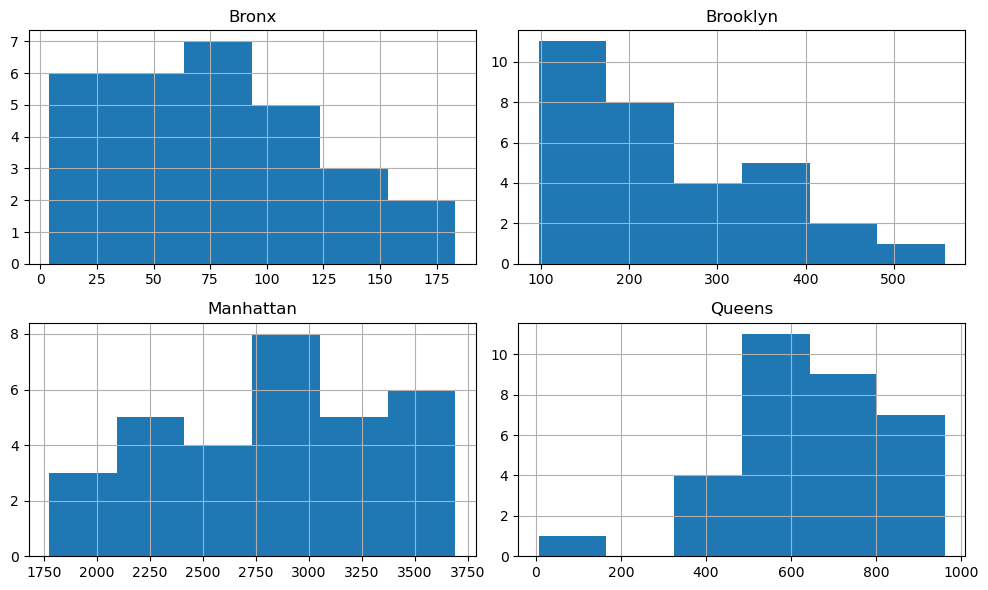

In [14]:
borough_pivot.hist(figsize=(10,6), bins=6);
plt.tight_layout();
plt.show()

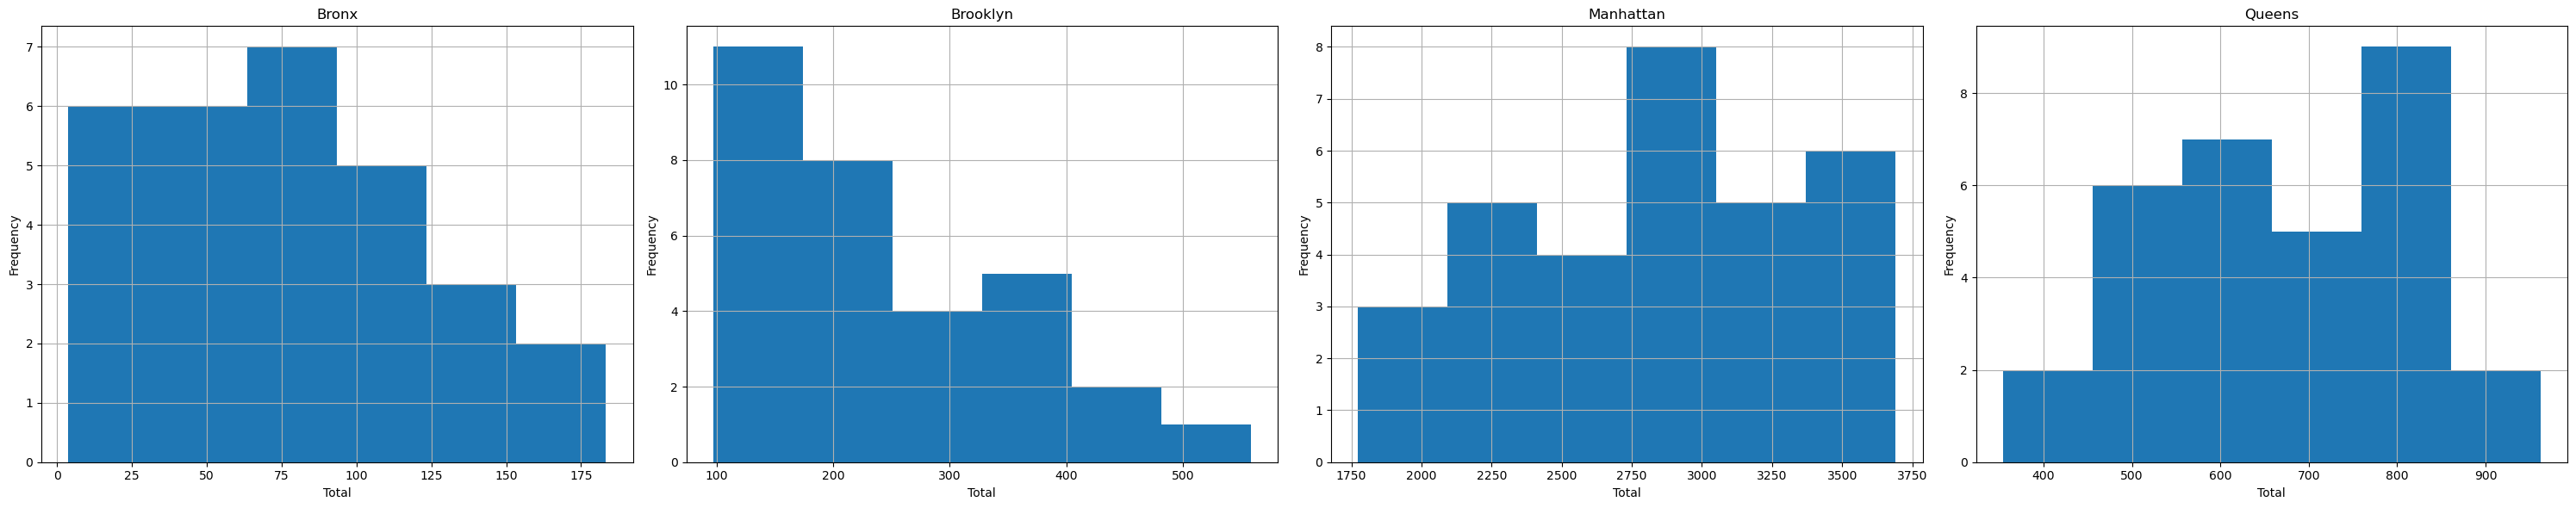

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(borough_pivot.columns), figsize=(30, 6))

for idx, column in enumerate(borough_pivot.columns):
    borough_pivot[column].hist(ax=axes[idx], bins=6)
    axes[idx].set_title(column)
    axes[idx].set_xlabel("Total")
    axes[idx].set_ylabel("Frequency")
    
plt.tight_layout()
plt.show()

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Порівнюємо розподіл денних сум платежів по райнам.<br>
We see that we have different ranges of checks on separate histograms. We compare the distribution of daily payment amounts by region.

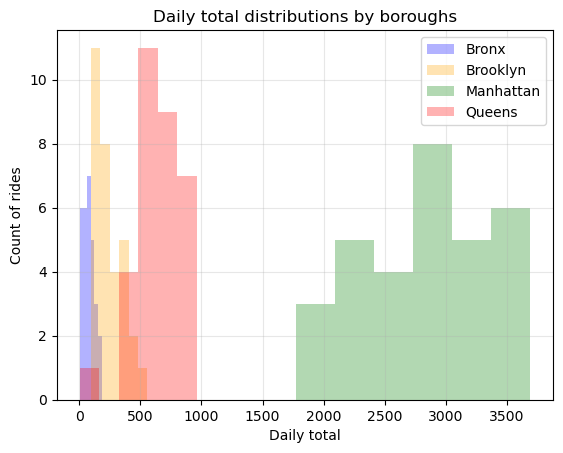

In [15]:
plt.hist(x=borough_pivot["Bronx"], alpha=0.3, bins=6, histtype="stepfilled", color="b")
plt.hist(x=borough_pivot["Brooklyn"], alpha=0.3, bins=6, histtype="stepfilled", color="orange")
plt.hist(x=borough_pivot["Manhattan"], alpha=0.3, bins=6, histtype="stepfilled", color="g")
plt.hist(x=borough_pivot["Queens"], alpha=0.3, bins=6, histtype="stepfilled", color="r")
plt.grid(axis="both", alpha=.3)
plt.xlabel("Daily total")
plt.ylabel("Count of rides")
plt.title("Daily total distributions by boroughs")
plt.legend(borough_pivot)

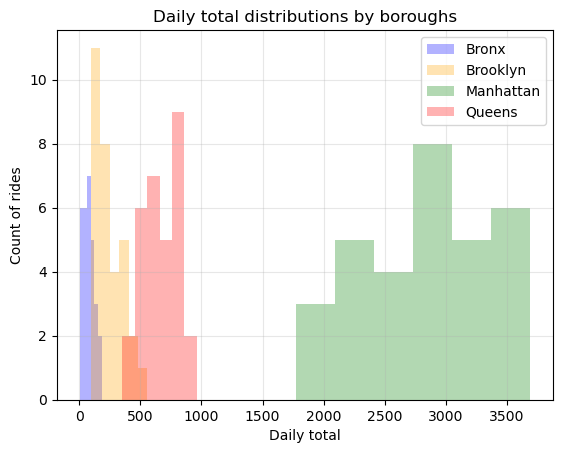

In [24]:
boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens"]
colors = ["b", "orange", "g", "r"]

bins = 6
alpha = 0.3
histtype = "stepfilled"

for i, borough in enumerate(boroughs):
    plt.hist(x=borough_pivot[borough], alpha=alpha, bins=bins, histtype=histtype, color=colors[i], label=borough)

plt.grid(axis="both", alpha=.3)
plt.title("Daily total distributions by boroughs")
plt.legend()
plt.xlabel("Daily total")
plt.ylabel("Count of rides")
plt.show()

Приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn.<br>
An example of how something similar could be created using the seaborn functionality.

Text(0.5, 1.0, 'Daily total distributions by boroughs')

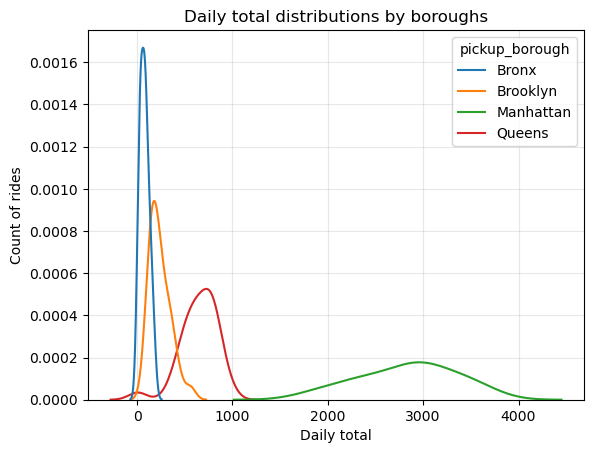

In [16]:
sns.kdeplot(data=borough_pivot);
plt.grid(axis="both", alpha=.3);
plt.xlabel("Daily total"); 
plt.ylabel("Count of rides");
plt.title("Daily total distributions by boroughs")

10.З допомогою seaborn виводимо гістограми суми щомісячних платежів по кольорам автомобілів.<br>
With the help of seaborn, we display histograms of the amount of monthly payments by car color.

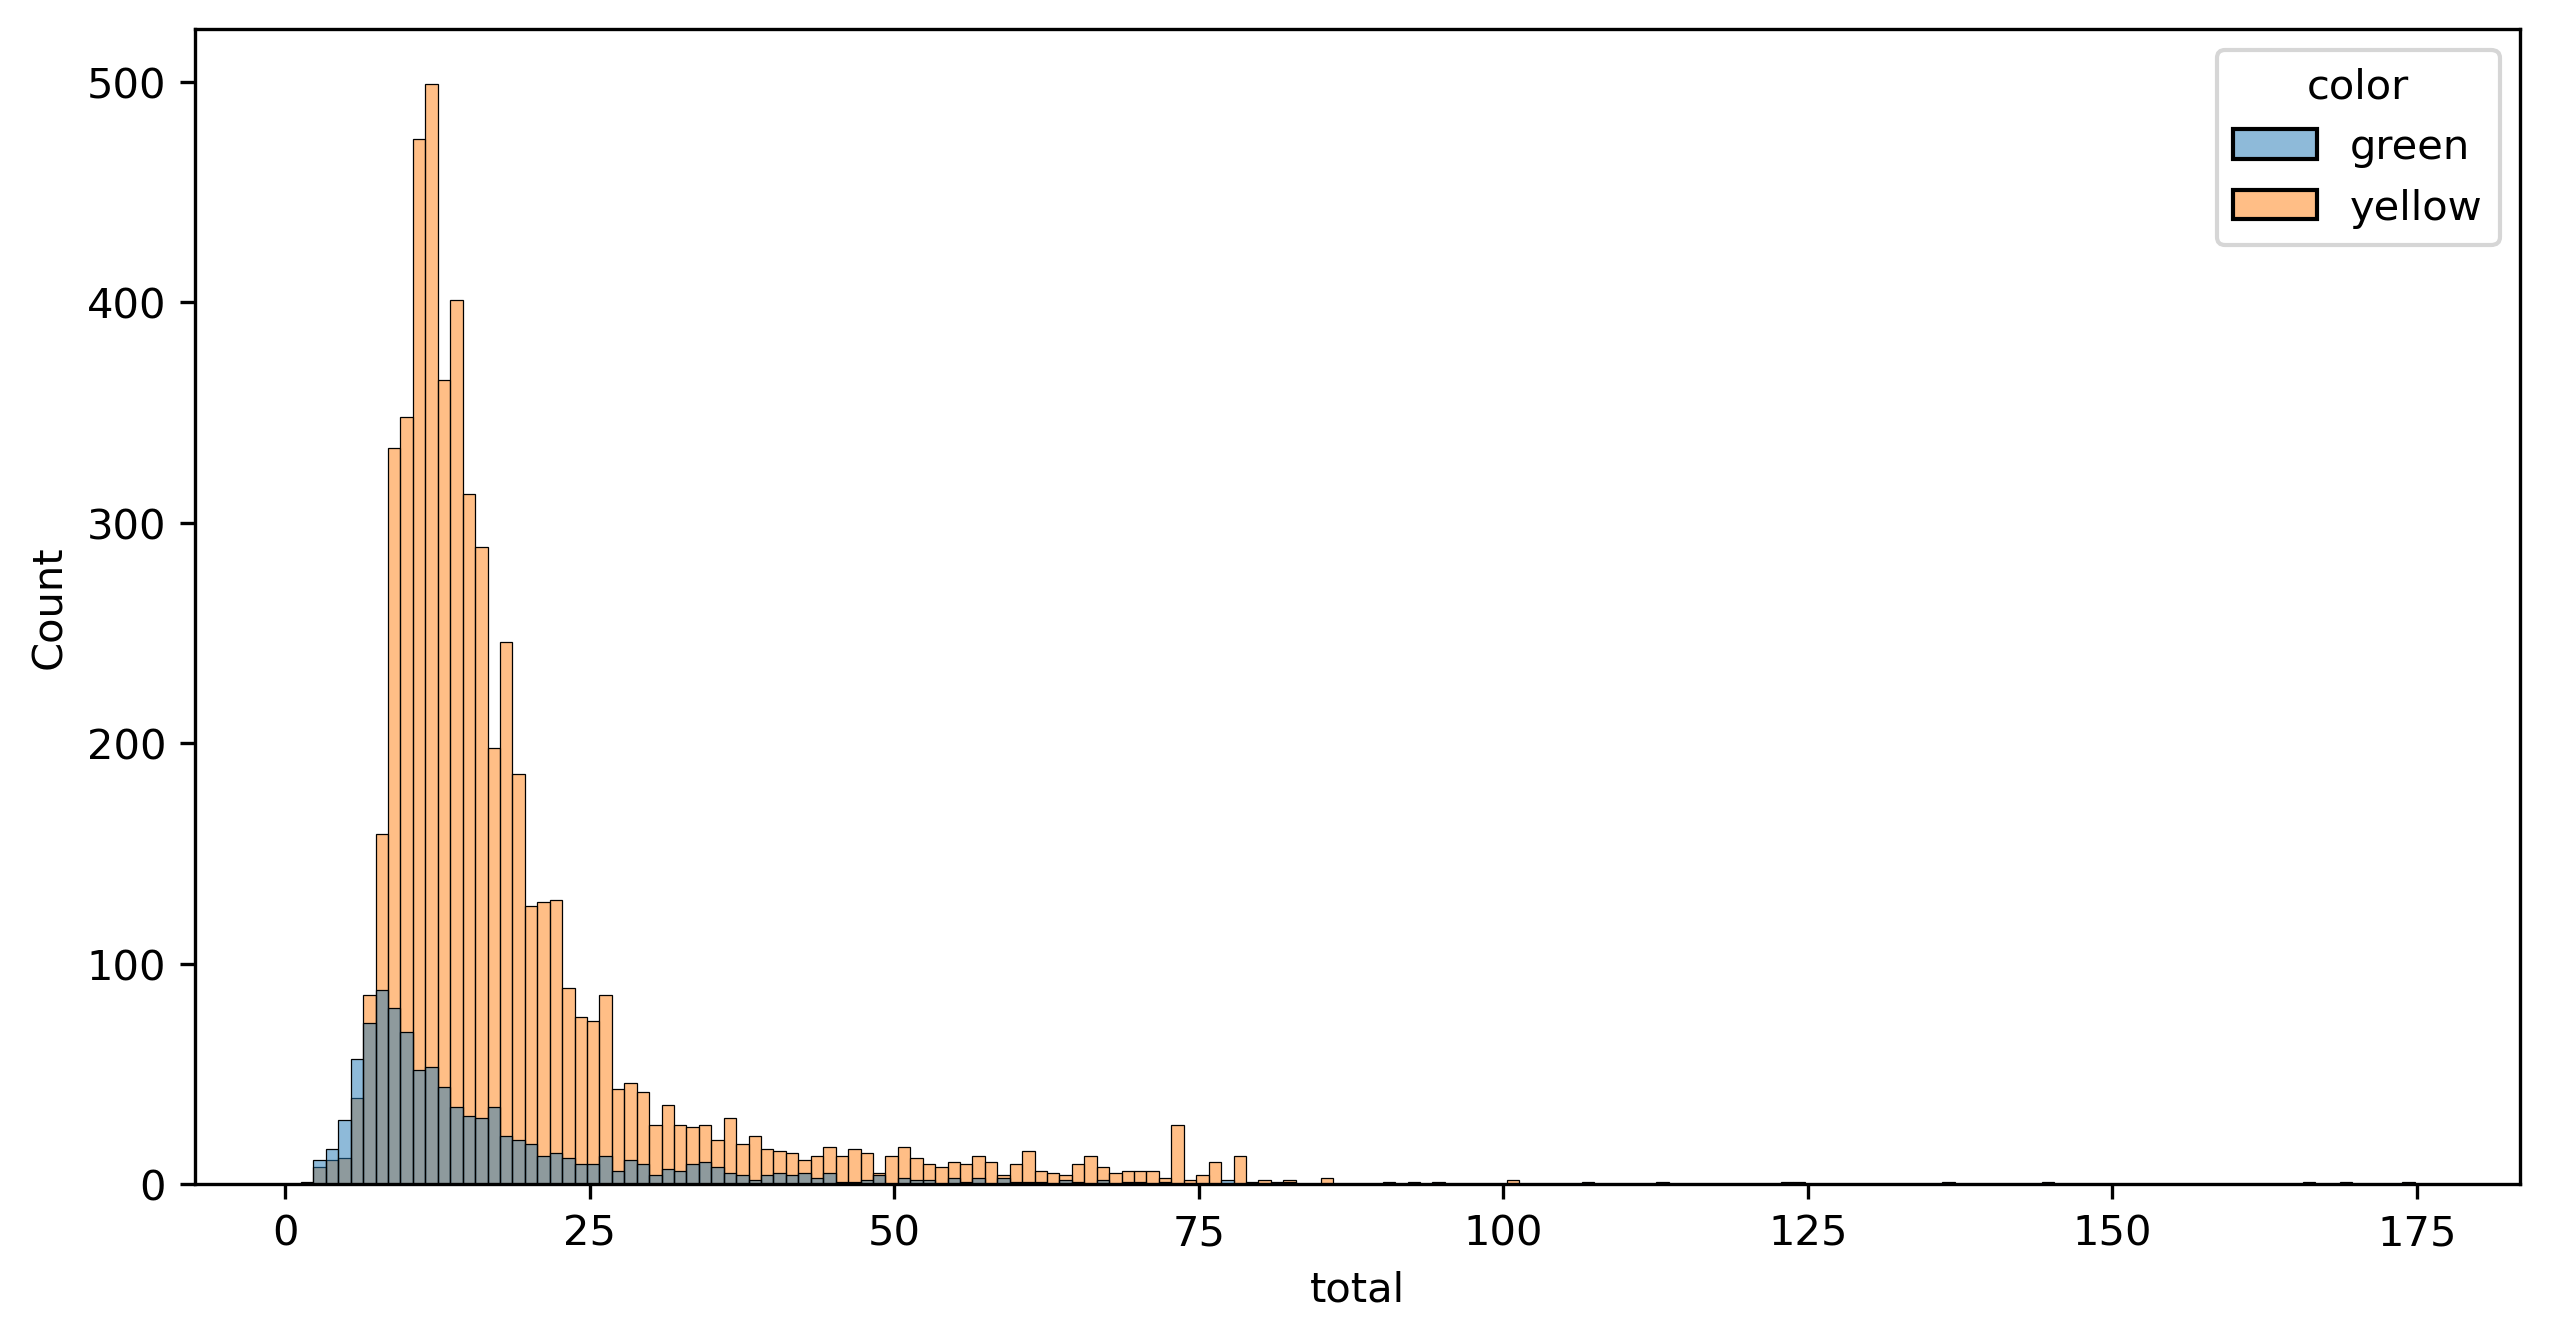

In [17]:
plt.figure(figsize=(10, 5), dpi=300) 
sns.histplot(data=df_taxi_clean.sort_values(by='color'), x='total', hue='color', alpha=0.5)
plt.xlabel("total"); 
plt.ylabel("Count");

11.Можливо є залежність між дальністю поїздки і розміром чайових? Будуємо діаграму розсіювання між дальністю поїздки і розміром чайових.<br>
Maybe there is a relationship between the distance of the trip and the size of the tip? We build a scatter diagram between the distance of the trip and the size of the tip.

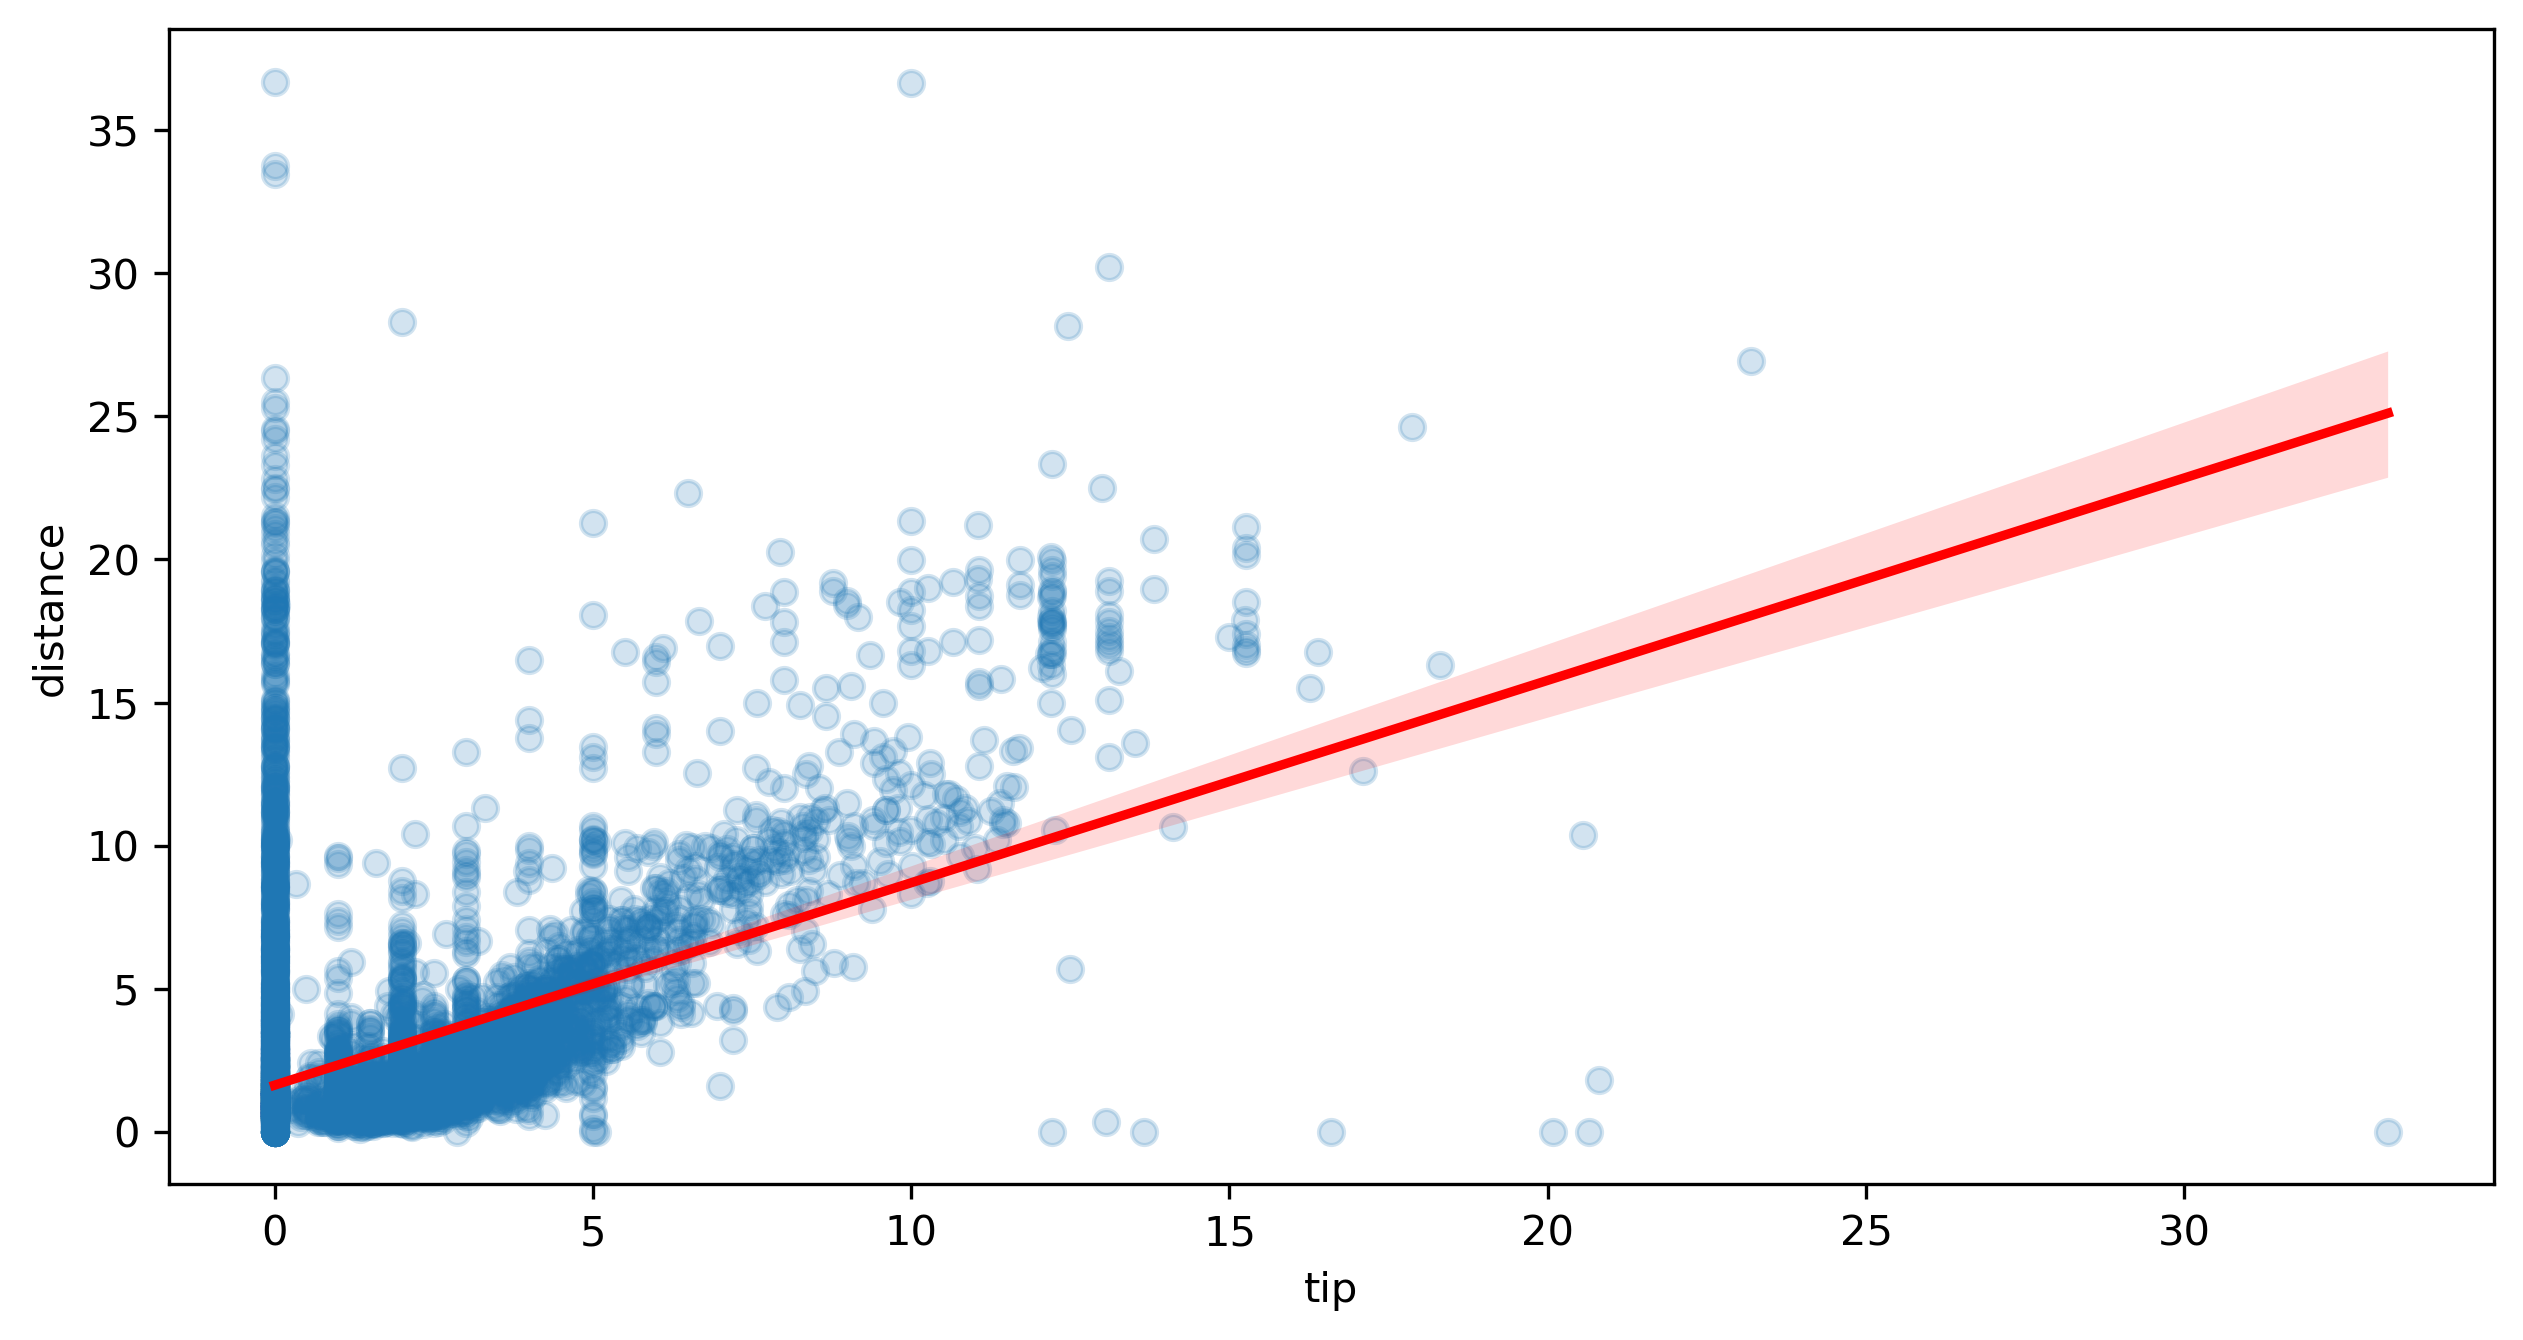

In [18]:
plt.figure(figsize=(10, 5), dpi=300) 
sns.regplot(data=df_taxi_clean, x='tip', y="distance", scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.xlabel("tip"); 
plt.ylabel("distance");

Так, залежить. Пряма лінія з точок, паралельна осі є тенденція між дистанцією та зростанням чайових в нашому випадку (бо напрям є діагоналним та зростаючим.<br>
Yes, it depends. A straight line of points parallel to the axis is the trend between distance and tip growth in our case (because the direction is diagonal and increasing

12. Побудували поденну динаміку чайових по районам, в яких забрали пасажира.<br>
Built the daily dynamics of tips in the areas where the passenger was picked up.

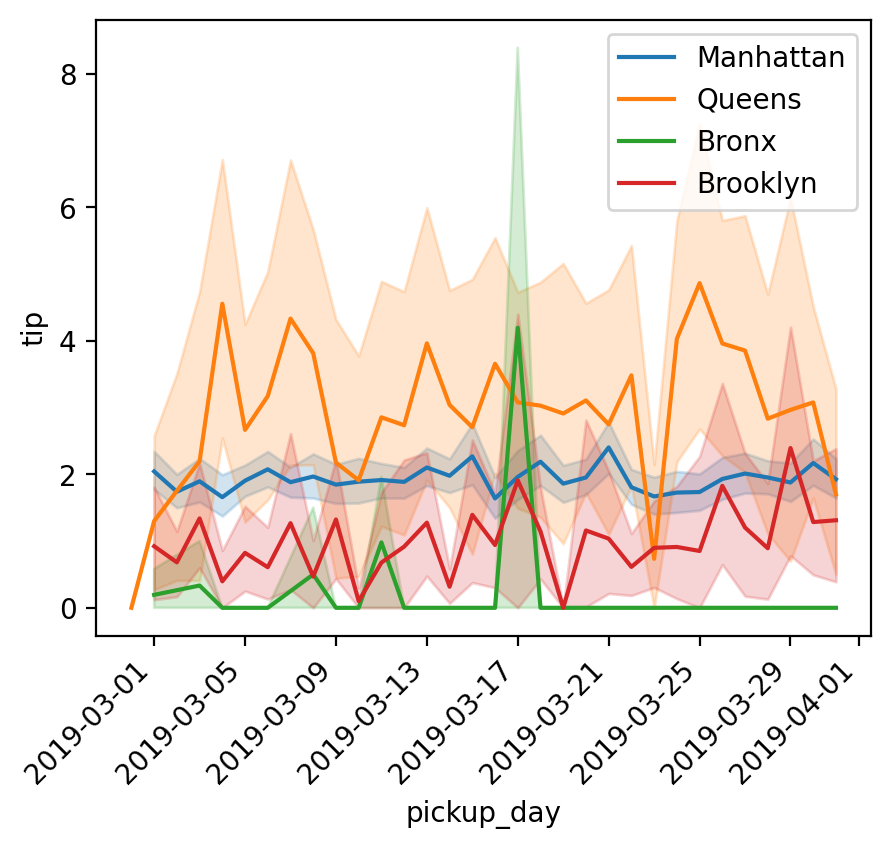

In [31]:
df_taxi_clean1 = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
plt.figure(figsize=(5, 4), dpi=200) 
sns.lineplot(data=df_taxi_clean1, x='pickup_day', y="tip", hue="pickup_borough")
plt.xticks(rotation=45, ha ="right")
plt.xlabel('pickup_day')
plt.ylabel('tip')
plt.legend();

Найнижчий середній розмір у Bronx.<br>
Найвищий середній розмір у Queens.<br>
Найстабільніший район Manhattan.<br>

Lowest average size in the Bronx.<br>
Highest average size in Queens.<br>
Manhattan's most stable neighborhood.

14. Побудувалои box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки.<br>
Constructed a box-plot of tip size by district (all districts except "NA") of the start of the trip.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Queens'),
  Text(2, 0, 'Bronx'),
  Text(3, 0, 'Brooklyn')])

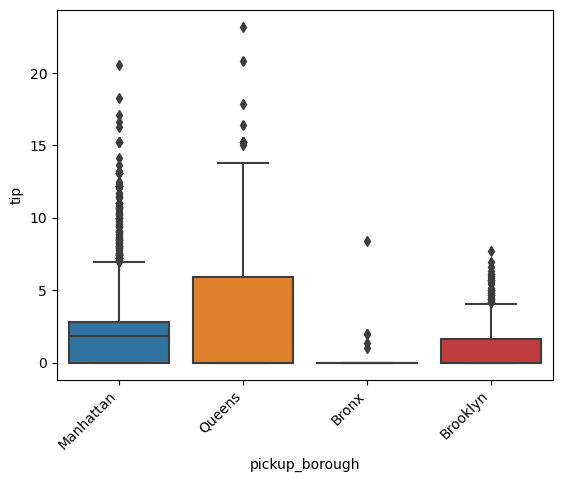

In [20]:
sns.boxplot(data=df_taxi_clean1, x='pickup_borough', y='tip')
plt.xticks(rotation=45, ha ="right")

Text(0, 0.5, 'Number of trips')

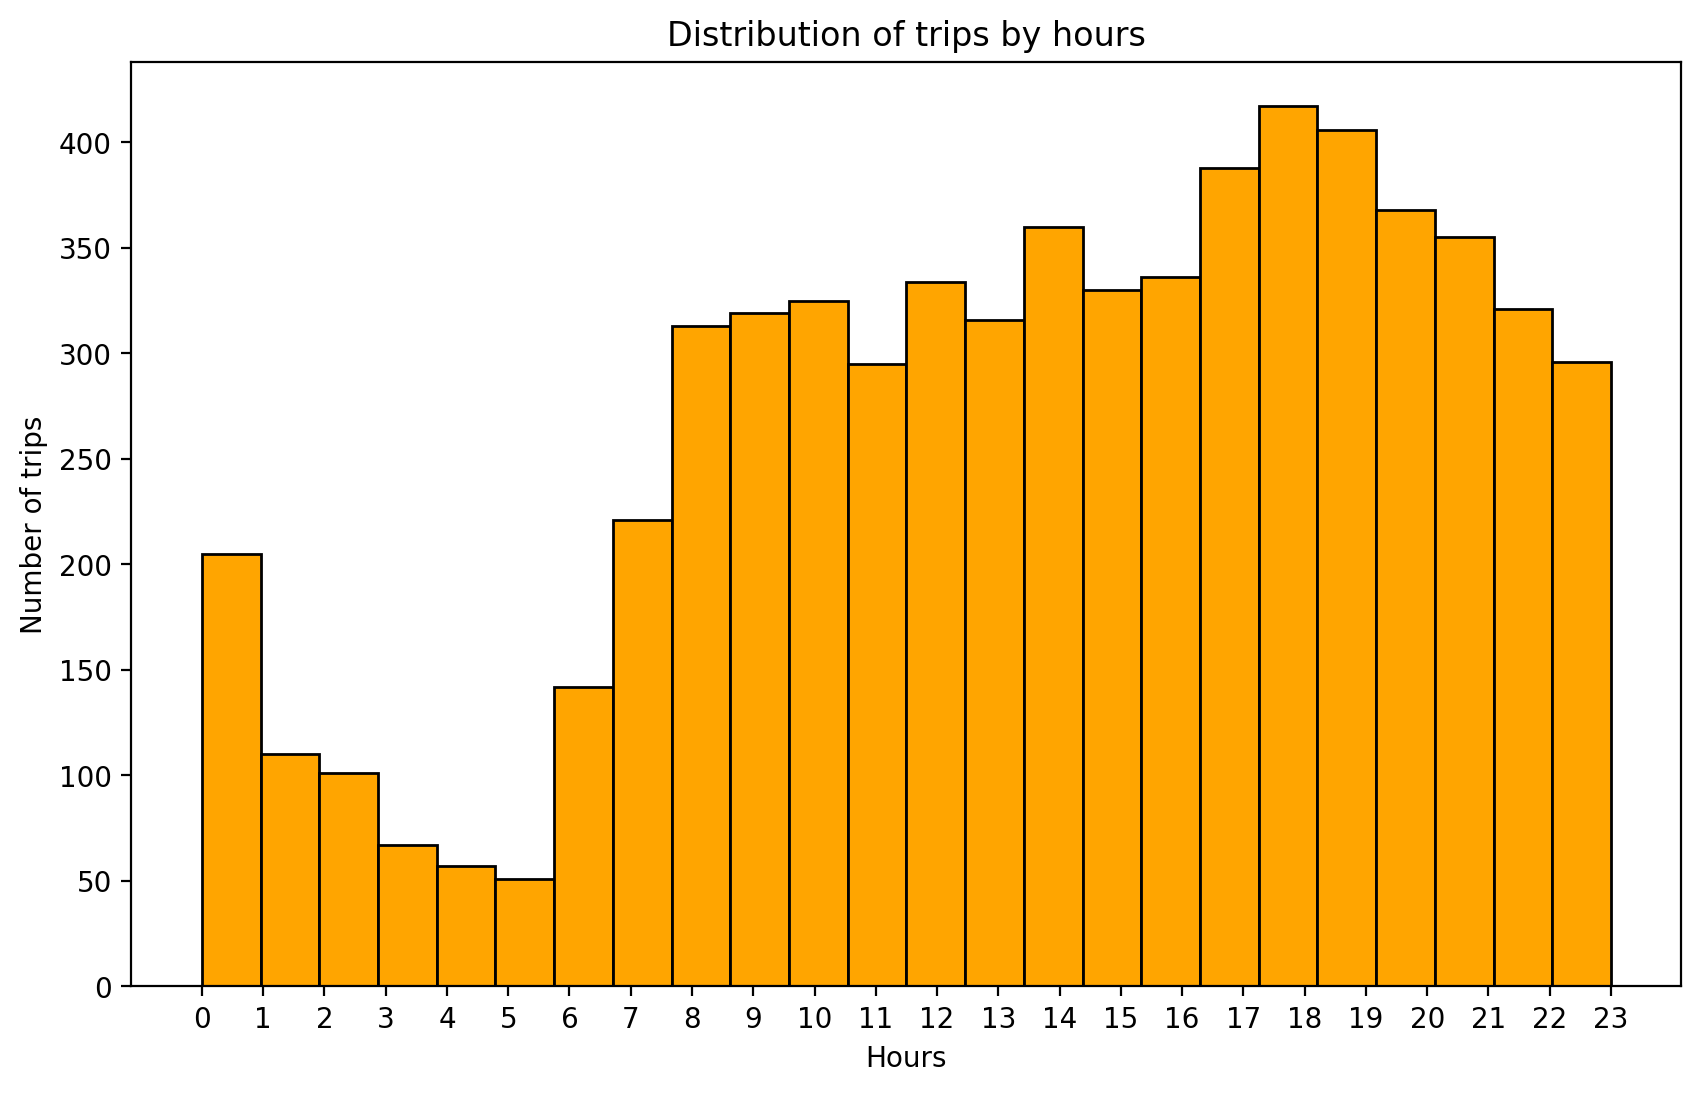

In [63]:
df_taxi_clean["pickup_datetime"]= pd.to_datetime(df_taxi_clean["pickup"])
df_taxi_clean["pickup_hour"]= df_taxi_clean["pickup_datetime"].dt.hour
plt.figure(figsize=(10,6), dpi=200)
plt.hist(df_taxi_clean["pickup_hour"], bins=24, color='orange', edgecolor='black')
plt.xticks(range(24))
plt.title("Distribution of trips by hours")
plt.xlabel("Hours")
plt.ylabel("Number of trips")

Найкращий час для поїздок починаючи з 17:00. Загалом аткивний час з 8:00-24:00<br>
The best time for trips is from 17:00. In general, the active time is from 8:00 a.m. to 12:00 p.m

Text(0.5, 1.0, 'Number of trips in each district')

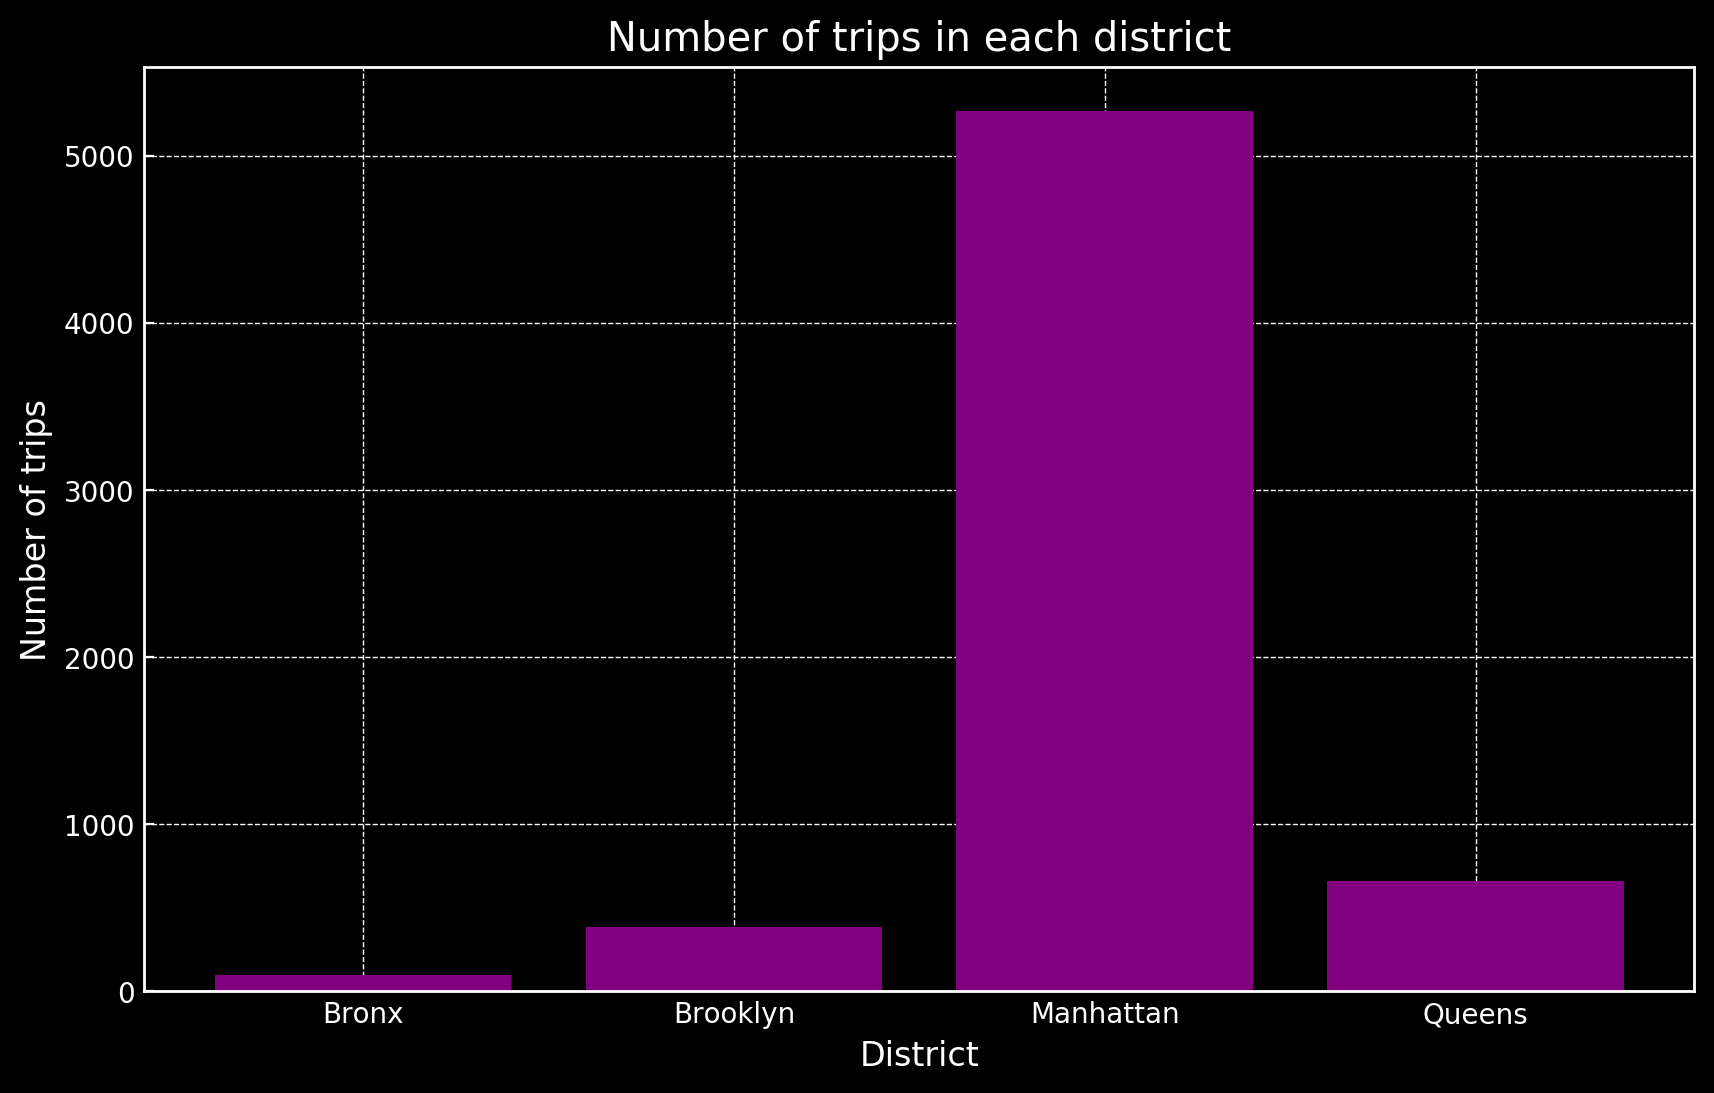

In [86]:
rides_per_borough= df_taxi_clean1.groupby("pickup_borough").size().reset_index(name='count_rides')
plt.figure(figsize=(10,6), dpi=200)
plt.style.use("dark_background")
plt.bar(rides_per_borough["pickup_borough"], rides_per_borough["count_rides"], color= "purple")
plt.xlabel('District')
plt.ylabel('Number of trips')
plt.title('Number of trips in each district')

Найбіьша кілість поїздок у Manhattan.<br>
The largest number of trips to Manhattan.

Text(0.5, 1.0, 'Tipping dependence on payment')

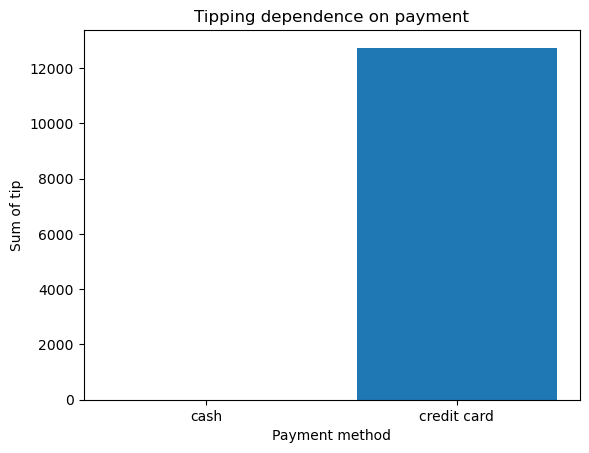

In [88]:
df_taxi_clean2= df_taxi_clean[df_taxi_clean["payment"] != "NA"]
payment_tip_avg = df_taxi_clean2.groupby("payment")["tip"].sum().reset_index()
plt.style.use("default")
plt.bar(payment_tip_avg['payment'], payment_tip_avg['tip'])
plt.xlabel('Payment method')
plt.ylabel("Sum of tip")
plt.title('Tipping dependence on payment')

Бачимо, що є залежність чайових від методу оплати поїздки (тому треба стимулювати цей метод оплати)<br>
We see that there is a dependence of tips on the method of payment for the trip (therefore, this method of payment should be encouraged)